In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from itertools import product

%matplotlib inline

In [2]:
# general setup

# agent must move to match self position and target position

# rewards are -1 for every time point

In [15]:
# Q LEARNING

ALPHA = .5
EPSILON=0.1
EPISODES = 10000
NPIXELX,NPIXELY = 25,25




In [16]:
# define agent class
class hand():
    def __init__(self, npixely, npixelx):
        self.hand_pos = [0,0]
        self.targ_pos = [None,None]
        self.npixelx = npixelx
        self.npixely = npixely
        self.wind = False
        self.wind_vec=[0,0]
        self._init_qfunc()
        
        self.actions = [[-1,0],
                       [1,0],
                       [0,-1],
                       [0,1],
                       [-1,-1],
                       [1,-1],
                       [-1,1],
                       [1,1]]
        
    def _init_qfunc(self):
        self.Q = {}
        for hposy in range(self.npixelx):
            for hposx in range(self.npixely):
                self.Q[(hposy,hposx)]= np.random.randn(8)
                
#                 for tposy in range(self.npixelx):
#                     for tposx in range(self.npixely):
#                         self.Q[(hposy,hposx)][(tposy,tposx)]= np.random.randn(8)
                        
    def init_hand_pos(self,y,x):
        self.hand_pos = [y,x]
    def update_hand_pos(self,dy,dx):
        self.hand_pos=[np.minimum(np.maximum(self.hand_pos[0]+dy,0),self.npixely-1),np.minimum(np.maximum(self.hand_pos[1]+dx,0),self.npixelx-1)]
        
    def init_targ_pos(self,y,x):
        self.targ_pos=[y,x]
                                
   
    def get_Q(self,hpos):
        return self.Q[tuple(hpos)]

    
    
                        



In [17]:
# init agent
h = hand(NPIXELY,NPIXELX)

# init Q function np.random.randn(gridpos_agent x gridpos_target x # of actions available) or as dictionary with [state][action] keys


In [ ]:
rewards = []
counter = 0
COUNTERS = []


for ep in range(EPISODES):

    # init state
    h.init_hand_pos(0,5)
    h.init_targ_pos(25,5)

    #     define terminal state
    if ep%10 ==0:
        print('episode',ep,counter)

    counter = 0
    while h.hand_pos != h.targ_pos:

        # choose action using Q[state] epsilon greedy
        if np.random.rand()<EPSILON:
            a = np.random.randint(8)
        else:
            a= np.argmax(h.get_Q(h.hand_pos))

    
    #         print('a',ay,ax)
        h_old = h.hand_pos[:]
        action = h.actions[a]
        h.update_hand_pos(action[0],action[1])
        
        
        if h.hand_pos != h.targ_pos:
            reward = -1
        else:
            reward = 0
        rewards.append(reward)
        h.Q[tuple(h_old)][a] += ALPHA*(reward + np.amax(h.get_Q(h.hand_pos)) - h.get_Q(h_old)[a])

        counter+=1
    COUNTERS.append(counter)

    

episode 0 0


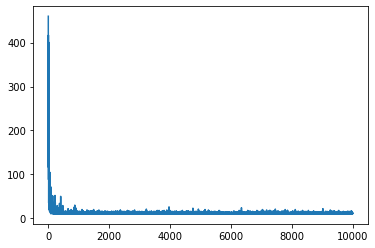

In [13]:
f,ax = plt.subplots()
# print(rewards)
ax.plot(COUNTERS[:])

In [14]:
hand_pos = []
h.init_hand_pos(0,5)
hand_pos.append(h.hand_pos[:])
h.init_targ_pos(10,5)
while h.hand_pos != h.targ_pos:
    # choose action using Q[state] epsilon greedy
    a = np.argmax(h.get_Q(h.hand_pos,h.targ_pos))
#     print(h.hand_pos)
    h.update_hand_pos(*h.actions[a])
    counter+=1
    hand_pos.append(h.hand_pos[:])

[[ 0  5]
 [ 1  5]
 [ 2  5]
 [ 3  5]
 [ 4  5]
 [ 5  5]
 [ 6  5]
 [ 7  5]
 [ 8  5]
 [ 9  6]
 [10  5]]


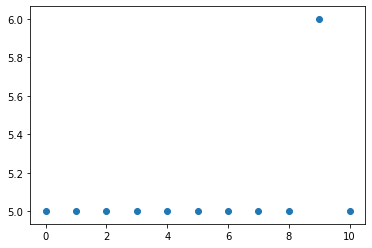

In [15]:
hand_pos = np.array(hand_pos)
print(hand_pos)
f,ax = plt.subplots()
ax.scatter(hand_pos[:,0],hand_pos[:,1])

In [40]:
h_wind = hand(NPIXELY,NPIXELX)
rewards = []
counter = 0
COUNTERS = []


for ep in range(EPISODES):

    # init state
    h_wind.init_hand_pos(0,5)
    h_wind.init_targ_pos(10,5)

    #     define terminal state
    if ep%1000 ==0:
        print('episode',ep,counter)

    counter = 0
    while h_wind.hand_pos != h_wind.targ_pos:

        # choose action using Q[state] epsilon greedy
        if np.random.rand()<EPSILON:
            a = np.random.randint(8)
        else:
            a= np.argmax(h_wind.get_Q(h_wind.hand_pos,h_wind.targ_pos))

    
    #         print('a',ay,ax)
        h_old = h_wind.hand_pos[:]
        action = h_wind.actions[a][:]
        
        # add wind - blows up between 3 and 5
        if (h_wind.hand_pos[0]>=3) and (h_wind.hand_pos[0]<=5):
            action[1]-=1
        
        
        h_wind.update_hand_pos(action[0],action[1])
        
#         print(h_old,h_wind.hand_pos,action)
        if h_wind.hand_pos != h_wind.targ_pos:
            reward = -1
        else:
            reward = 0
        rewards.append(reward)
        h_wind.Q[tuple(h_old)][tuple(h_wind.targ_pos)][a] += ALPHA*(reward + np.amax(h_wind.get_Q(h_wind.hand_pos,h_wind.targ_pos)) - h_wind.get_Q(h_old,h_wind.targ_pos)[a])

        counter+=1
    COUNTERS.append(counter)

episode 0 0
episode 1000 12
episode 2000 16
episode 3000 10
episode 4000 10
episode 5000 10
episode 6000 12
episode 7000 10
episode 8000 11
episode 9000 10


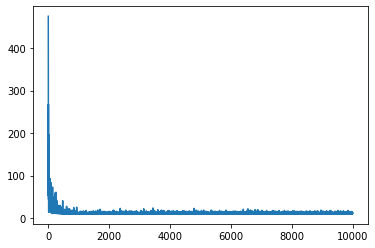

In [41]:
f,ax = plt.subplots()
ax.plot(COUNTERS)

In [42]:
hand_pos = []
h_wind.init_hand_pos(0,5)
hand_pos.append(h_wind.hand_pos[:])
h_wind.init_targ_pos(10,5)
while h_wind.hand_pos != h_wind.targ_pos:
    # choose action using Q[state] epsilon greedy
    a = np.argmax(h_wind.get_Q(h_wind.hand_pos,h_wind.targ_pos))
#     print(h.hand_pos)
    action = h_wind.actions[a][:]
        
    # add wind - blows up between 3 and 5
    if (h_wind.hand_pos[0]>=3) and (h_wind.hand_pos[0]<=5):
        action[1]-=1
    h_wind.update_hand_pos(action[0],action[1])
    hand_pos.append(h_wind.hand_pos[:])

[[ 0  5]
 [ 1  5]
 [ 2  5]
 [ 3  5]
 [ 4  4]
 [ 5  3]
 [ 6  3]
 [ 7  4]
 [ 8  4]
 [ 9  5]
 [10  5]]


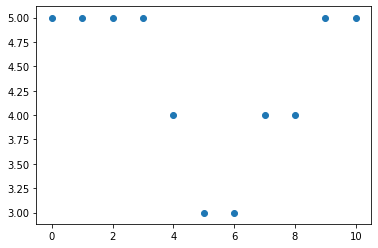

In [43]:
hand_pos = np.array(hand_pos)
print(hand_pos)
f,ax = plt.subplots()
ax.scatter(hand_pos[:,0],hand_pos[:,1])